# Lab - Filtragem Digital

Esta atividade explora 3 diferentes maneiras de se realizar a filtragem digital.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import lfilter, ellip, freqz


1) Considere para n=0...31, o sinal $x_1[n]$ uma senoide de baixa frequência com 2 ciclos exatos, o sinal $x_2[n]$ uma senoide de alta frequência com 6 ciclos exatos e o sinal $x[n]$ sendo a soma destes dois. Considere agora para n=0..63, o sinal $x_0[n]= \{x[n]$, n=0...31; 0, n=32...63\}.<br> Plote o sinal $x_0[n]$ (n=0..63) e o sinal $x[n]$ (n=0...31), com símbolo 'o', no mesmo eixo n. Plote $X[k]$ a DFT do sinal $x[n]$ em outro grafico.

64


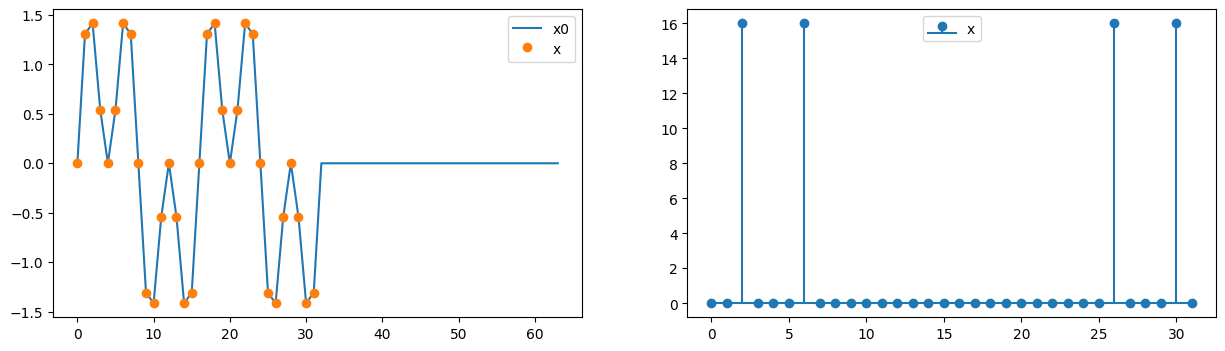

In [2]:
x1 = sin((2*2*pi*linspace(0,32,32,endpoint=False))/32)
x2 = sin((6*2*pi*linspace(0,32,32,endpoint=False))/32)
x0 = concatenate((x1+x2,zeros(32)))
x = x1 + x2
figure(figsize=(15,4))
subplot(1,2,1)
plot(x0,label='x0')
stem(x,markerfmt='C1o',linefmt='none',basefmt='none',label='x')
legend()
subplot(1,2,2)
stem(linspace(0,32,32,endpoint=False),abs(fft(x)),linefmt='C0',basefmt='C0',label='x')
print(len(x0))
legend()
show()

2) Obtenha os coeficientes de um filtro elíptico de quarta ordem com frequência normalizada de corte igual a 0,25 ($w=\pi/4$). Visualize a resposta em frequência do filtro calculado, e a DFT do sinal $x[n]$ no mesmo eixo, para frequências de 0 a $\pi$.

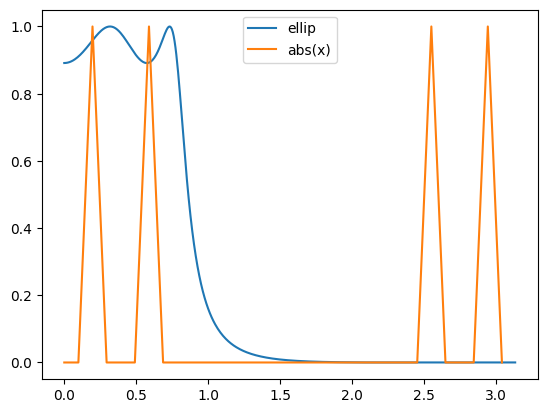

In [3]:
b,a = ellip(4,1,80,Wn=0.25)
w,h = freqz(b,a)
f = lfilter(b,a,x)
xx = abs(fft(x))
yy = linspace(0,pi,512,endpoint=False)
yyyy = linspace(0,pi,32,endpoint=False)
plot(yy,abs(h),label='ellip')
plot(yyyy,xx/max(xx),label='abs(x)')
legend()
show()

4) filtre o sinal $x_0[n]$ com a função aplicando a equação recursiva de diferenças com os coeficientes do filtro elíptico (função lfilter()) obtendo $y_1[n]$ com 64 pontos. 

In [4]:
y1 = lfilter(b,a,x0)

5) filtre o sinal $x[n]$ realizando a convolução com a resposta impulsional do filtro, obtendo sinal $y_2[n]$ com 64 pontos.<br>
Dica: pode-se obter a resposta ao impulso, $h[n]$, ao se aplicar um impulso $\delta[n]$ na entrada do filtro.

In [5]:
d = concatenate((ones(1),zeros(63)))
h = lfilter(b,a,d)
y2 = convolve(x0,h)

6) filtre o sinal $x_0[n]$, fazendo produto no domínio da frequência com a resposta em frequência do filtro obtendo $Y_3[k]=X[k] H[k]$, com 64 valores, e depois $y_3[n]$ pela transformada de Fourier inversa. Plote a magnitude de $Y_3[k]$ juntamente com a magnitude de $H[k]$, de $0...2\pi$.

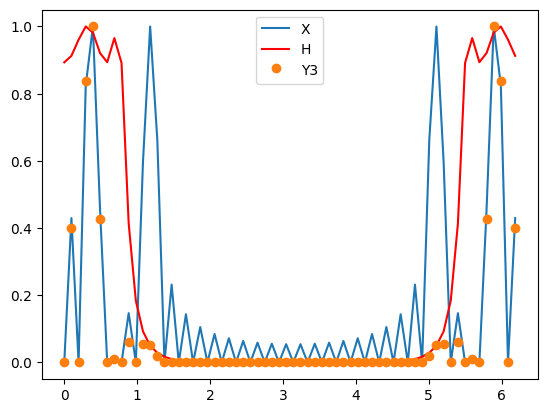

In [6]:
X = fft(x0)
H = fft(h)
Y3 = X*H
y3 = ifft(Y3)

yyy = linspace(0,2*pi,64,endpoint=False)
plot(yyy,abs(X)/max(abs(X)),label='X')
plot(yyy,abs(H)/max(abs(H)),label='H',color='r')
stem(yyy,abs(Y3)/max(abs(Y3)),markerfmt='C1o',linefmt='none',basefmt='none',label='Y3')
legend()
show()


7) plote os 3 resultados no mesmo eixo: <br>
   a) No tempo: $y_1[n],y_2[n], y_3[n]$ <br>
   b) Em frequência: magnitudes de $Y_1[k],Y_2[k], Y_3[k]$ <br>

c:\Users\Carlos\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


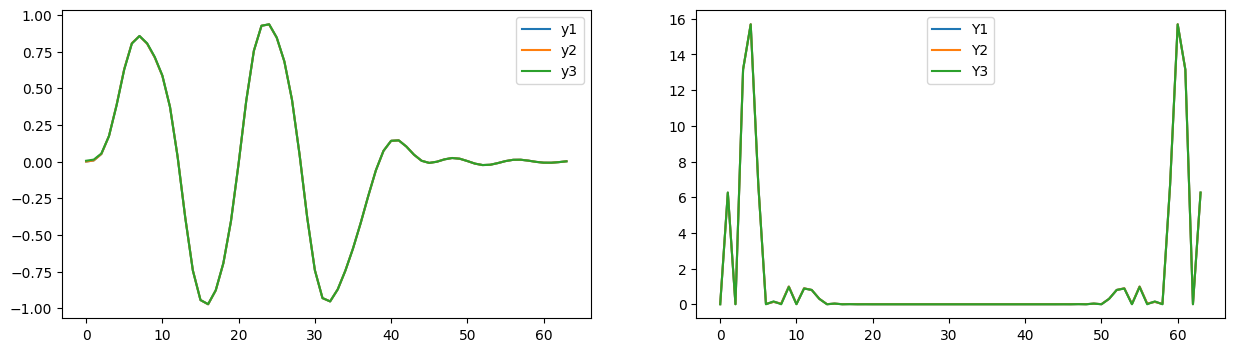

In [7]:
figure(figsize=(15,4))
subplot(1,2,1)
plot(y1,label='y1')
plot(y2[0:64],label='y2')
plot(y3,label='y3')
Y1 = abs(fft(y1))
Y2 = abs(fft(y2[0:64]))
legend()
subplot(1,2,2)
plot(Y1,label='Y1')
plot(Y2,label='Y2')
plot(abs(Y3),label='Y3')
legend()
show()